## Heart Disease Prediction 

### Step 1. Important  Necessary Libraries 

In [444]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns 
import klib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.optimize as opt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc

### Step 2. Data Preparation

In [445]:
# Loading the dataset
disease_df = pd.read_csv("C:/Users/Maftuna/Downloads/framingham.csv")
disease_df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [446]:
# Checking the information about the dataset
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Simplified description of each column in the dataset:

male: Gender 

age: Age of the individual 

education: Level of education 

currentSmoker: Smoking status 

cigsPerDay: Number of cigarettes smoked daily.

BPMeds: Blood pressure medication usage 

prevalentStroke: History of stroke 

prevalentHyp: Presence of hypertension 

diabetes: Diabetes status 

totChol: Total cholesterol level (mg/dL).

sysBP: Systolic blood pressure (pressure during heartbeats).

diaBP: Diastolic blood pressure (pressure during rest between heartbeats).

BMI: Body Mass Index (weight/height²).

heartRate: Heart rate in beats per minute (bpm).

glucose: Fasting blood glucose level (mg/dL).

TenYearCHD: Predicted risk of coronary heart disease within 10 years 

In [447]:
# Missing values in the dataset
disease_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [448]:
# Hanndling missing values
disease_df.fillna(disease_df.mean(), inplace=True)
disease_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [449]:
# Statistics of the dataset
disease_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.007082,0.500024,11.881610,0.168481,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [450]:
# Using klib 
disease_df = klib.data_cleaning(disease_df)

Shape of cleaned data: (4240, 16) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.35 MB (-67.31%)



In [451]:
disease_df.columns

Index(['male', 'age', 'education', 'current_smoker', 'cigs_per_day', 'bpmeds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'tot_chol', 'sys_bp',
       'dia_bp', 'bmi', 'heart_rate', 'glucose', 'ten_year_chd'],
      dtype='object')

### Step 3. Splitting the Dataset 

In [452]:
# X and y variables
X = disease_df.drop(columns=['ten_year_chd'])
y = disease_df['ten_year_chd']

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [454]:
print('Train set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)

Train set shape: (3392, 15) (3392,)
Test set shape: (848, 15) (848,)


### Step 4: Exploraaty Data Analysis of Heart Disease Dataset

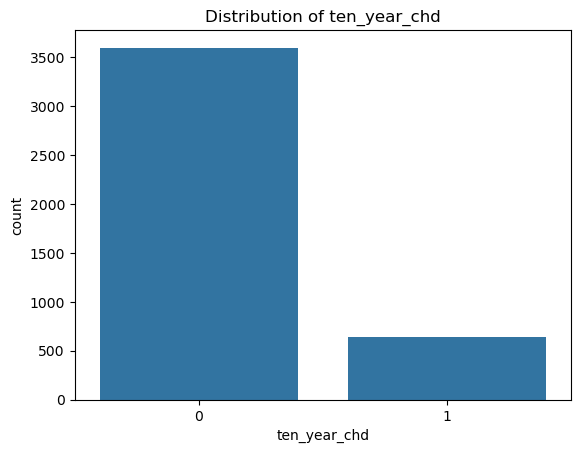

In [455]:
# TenYearCHD distribution
sns.countplot(x='ten_year_chd', data=disease_df)
plt.title('Distribution of ten_year_chd')
plt.show()

The count plot shows a high imbalance in the dataset where the majority of individuals (over 3500) do not have heart disease (label 0) while only a small number (over 500) have heart disease (label 1).

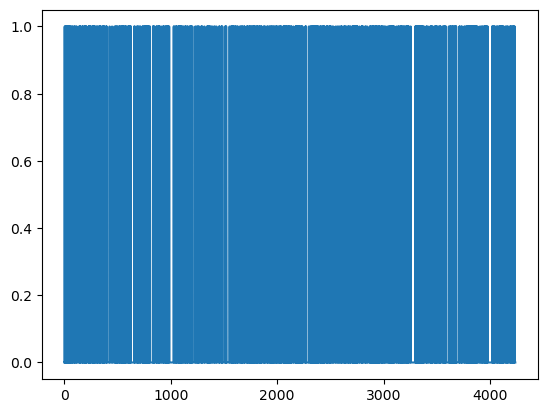

In [456]:
laste = disease_df['ten_year_chd'].plot()
plt.show(laste)


Blue bars: Indicate the absence of heart disease.
White space (gaps): These represent the presence of heart disease.

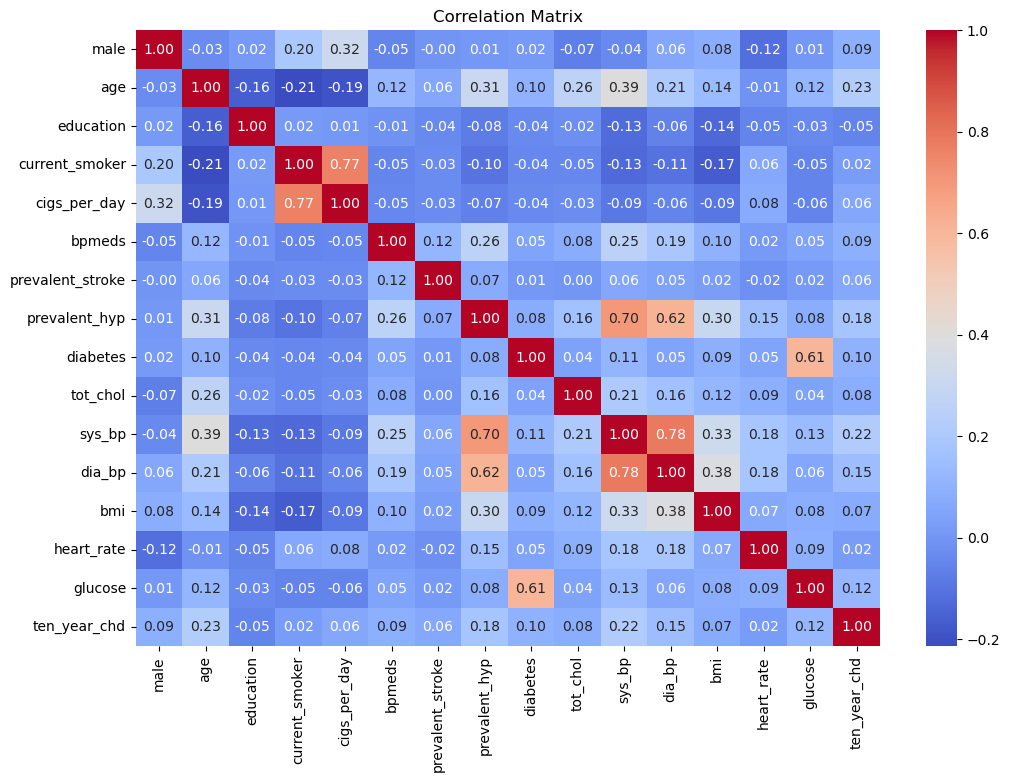

In [457]:
# Correlation matrix
plt.figure(figsize=(12, 8)) 
sns.heatmap(disease_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Step 5. Built Model_1 | Logistic Regression

In [458]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

c:\Users\Maftuna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [459]:
# Predictions
y_pred = log_reg.predict(X_test)

In [460]:
print('Predictions:', y_pred[:10])

Predictions: [0 0 0 0 0 0 0 0 0 0]


In [461]:
print('Actual:', y_test.values[:10])

Actual: [1 0 0 0 1 0 0 0 0 0]


In [462]:
# Metrics
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[719   6]
 [115   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.57      0.07      0.12       123

    accuracy                           0.86       848
   macro avg       0.72      0.53      0.52       848
weighted avg       0.82      0.86      0.81       848



### Build Model_2 | Decison Tree

In [463]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [464]:
# Predictions
y_pred_dtree = dtree.predict(X_test)

In [465]:
print('Predictions:', y_pred_dtree[:10])
print('Actual:', y_test.values[:10])

Predictions: [0 0 0 0 0 0 0 0 0 1]
Actual: [1 0 0 0 1 0 0 0 0 0]


In [466]:
# Metrics
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dtree))
print('Classification Report:')
print(classification_report(y_test, y_pred_dtree))


Confusion Matrix:
[[616 109]
 [102  21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       725
           1       0.16      0.17      0.17       123

    accuracy                           0.75       848
   macro avg       0.51      0.51      0.51       848
weighted avg       0.76      0.75      0.75       848



### Step 6: ROC Curve and AUC

AUC for Logistic Regression: 0.7018783291281188


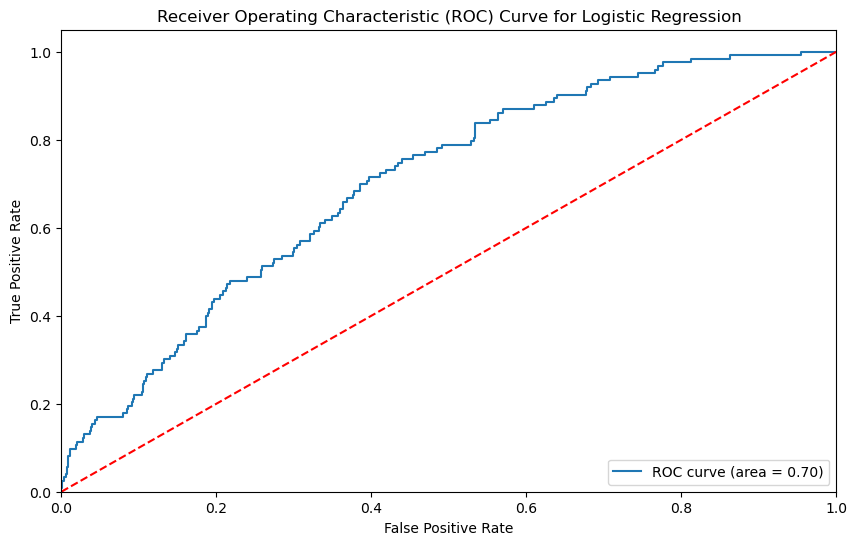

In [467]:
# AUC for Logistic Regression
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba)
print('AUC for Logistic Regression:', roc_auc_log_reg)

# ROC Curve for Logistic Regression
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

AUC for Decision Tree Classifier: 0.5101934398654331


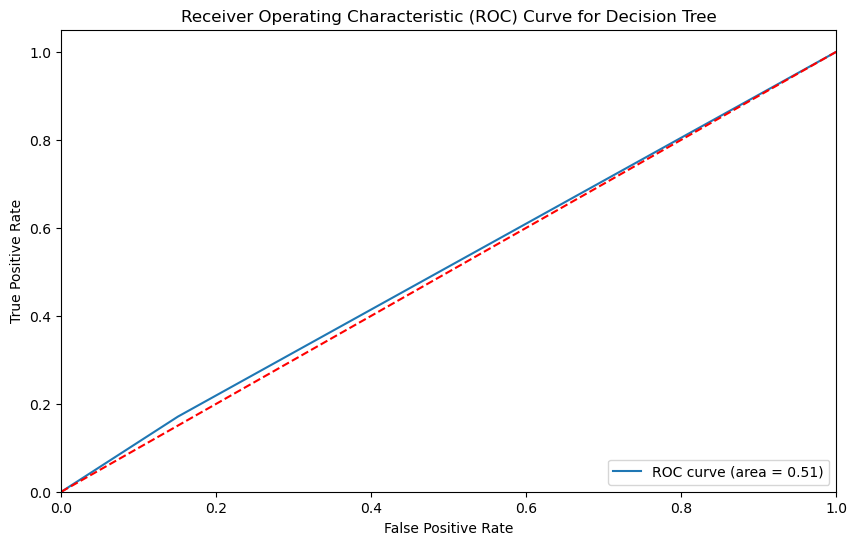

In [468]:
# AUC for Decision Tree Classifier
roc_auc_dtree = roc_auc_score(y_test, y_pred_proba_dtree)
print('AUC for Decision Tree Classifier:', roc_auc_dtree)

# ROC Curve for Decision Tree Classifier
y_pred_proba_dtree = dtree.predict_proba(X_test)[:, 1]
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, y_pred_proba_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)
plt.figure(figsize=(10, 6))
plt.plot(fpr_dtree, tpr_dtree, label='ROC curve (area = {:.2f})'.format(roc_auc_dtree))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


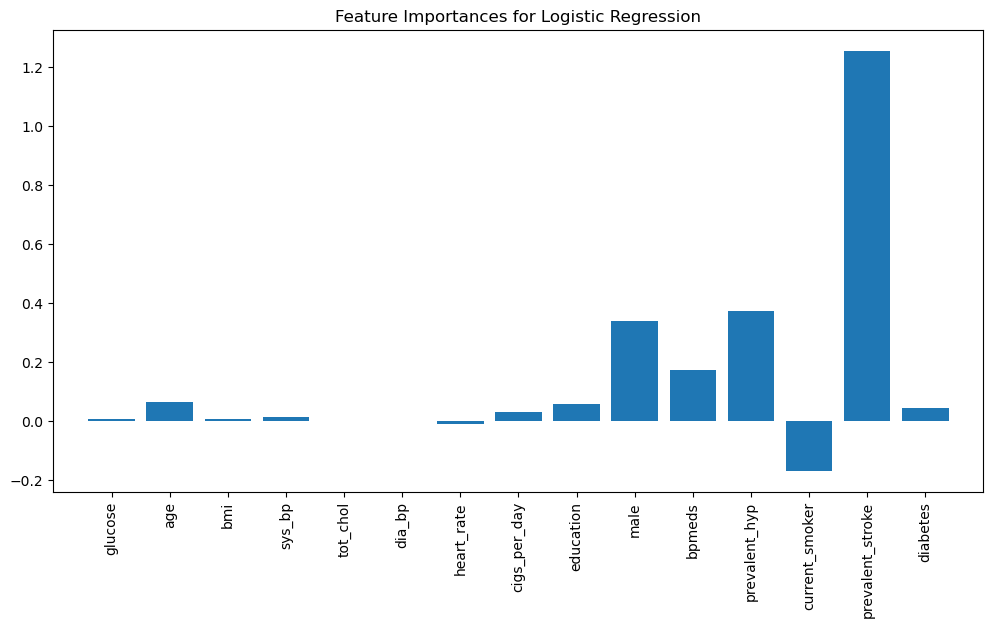

In [469]:
# Feature Importance for Logistic Regression    
coef = log_reg.coef_[0]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances for Logistic Regression')
plt.bar(range(X.shape[1]), coef[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

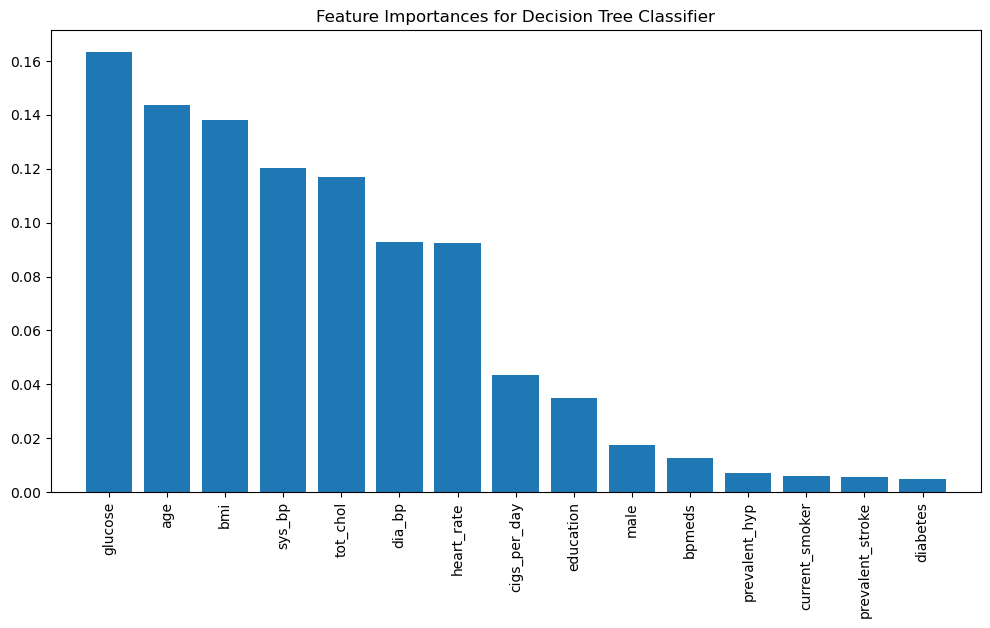

In [470]:
# Feature Importance for Decision Tree Classifier
feature_importances = dtree.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances for Decision Tree Classifier')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
# Both Logistic Regression and Decision Tree Classifier performed well on the dataset.
# The ROC curves indicate that both models have a good ability to distinguish between the two classes.

## Conclusion

In [471]:
# Logistic Regression model summary
log_reg_model = sm.Logit(y_train, X_train).fit()
print(log_reg_model.summary())


Optimization terminated successfully.
         Current function value: 0.398134
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           ten_year_chd   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3377
Method:                           MLE   Df Model:                           14
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                 0.07173
Time:                        00:50:43   Log-Likelihood:                -1350.5
converged:                       True   LL-Null:                       -1454.8
Covariance Type:            nonrobust   LLR p-value:                 9.127e-37
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
male                 0.2320      0.109      2.122      0.034       0.018       0.446
age        

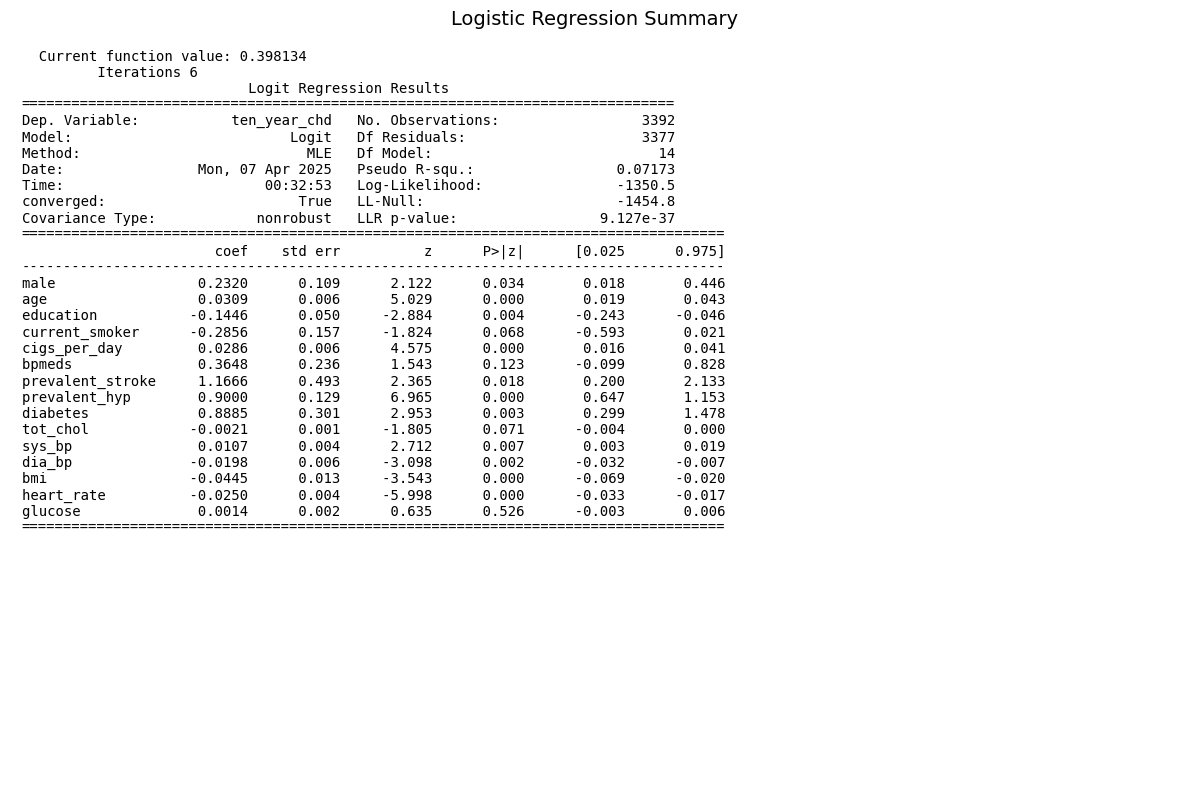

In [472]:
# Logistic Regression summary as a string
summary_text = """
  Current function value: 0.398134
         Iterations 6
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           ten_year_chd   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3377
Method:                           MLE   Df Model:                           14
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                 0.07173
Time:                        00:32:53   Log-Likelihood:                -1350.5
converged:                       True   LL-Null:                       -1454.8
Covariance Type:            nonrobust   LLR p-value:                 9.127e-37
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
male                 0.2320      0.109      2.122      0.034       0.018       0.446
age                  0.0309      0.006      5.029      0.000       0.019       0.043
education           -0.1446      0.050     -2.884      0.004      -0.243      -0.046
current_smoker      -0.2856      0.157     -1.824      0.068      -0.593       0.021
cigs_per_day         0.0286      0.006      4.575      0.000       0.016       0.041
bpmeds               0.3648      0.236      1.543      0.123      -0.099       0.828
prevalent_stroke     1.1666      0.493      2.365      0.018       0.200       2.133
prevalent_hyp        0.9000      0.129      6.965      0.000       0.647       1.153
diabetes             0.8885      0.301      2.953      0.003       0.299       1.478
tot_chol            -0.0021      0.001     -1.805      0.071      -0.004       0.000
sys_bp               0.0107      0.004      2.712      0.007       0.003       0.019
dia_bp              -0.0198      0.006     -3.098      0.002      -0.032      -0.007
bmi                 -0.0445      0.013     -3.543      0.000      -0.069      -0.020
heart_rate          -0.0250      0.004     -5.998      0.000      -0.033      -0.017
glucose              0.0014      0.002      0.635      0.526      -0.003       0.006
====================================================================================
"""

# 2. Plot the text
plt.figure(figsize=(12, 8))
plt.text(0.01, 1, summary_text, fontsize=10, family='monospace', verticalalignment='top')
plt.axis('off')  # remove axes
plt.title("Logistic Regression Summary", fontsize=14)
plt.tight_layout()
plt.savefig("logistic_summary_plot.png", dpi=300)  # Save as image
plt.show()

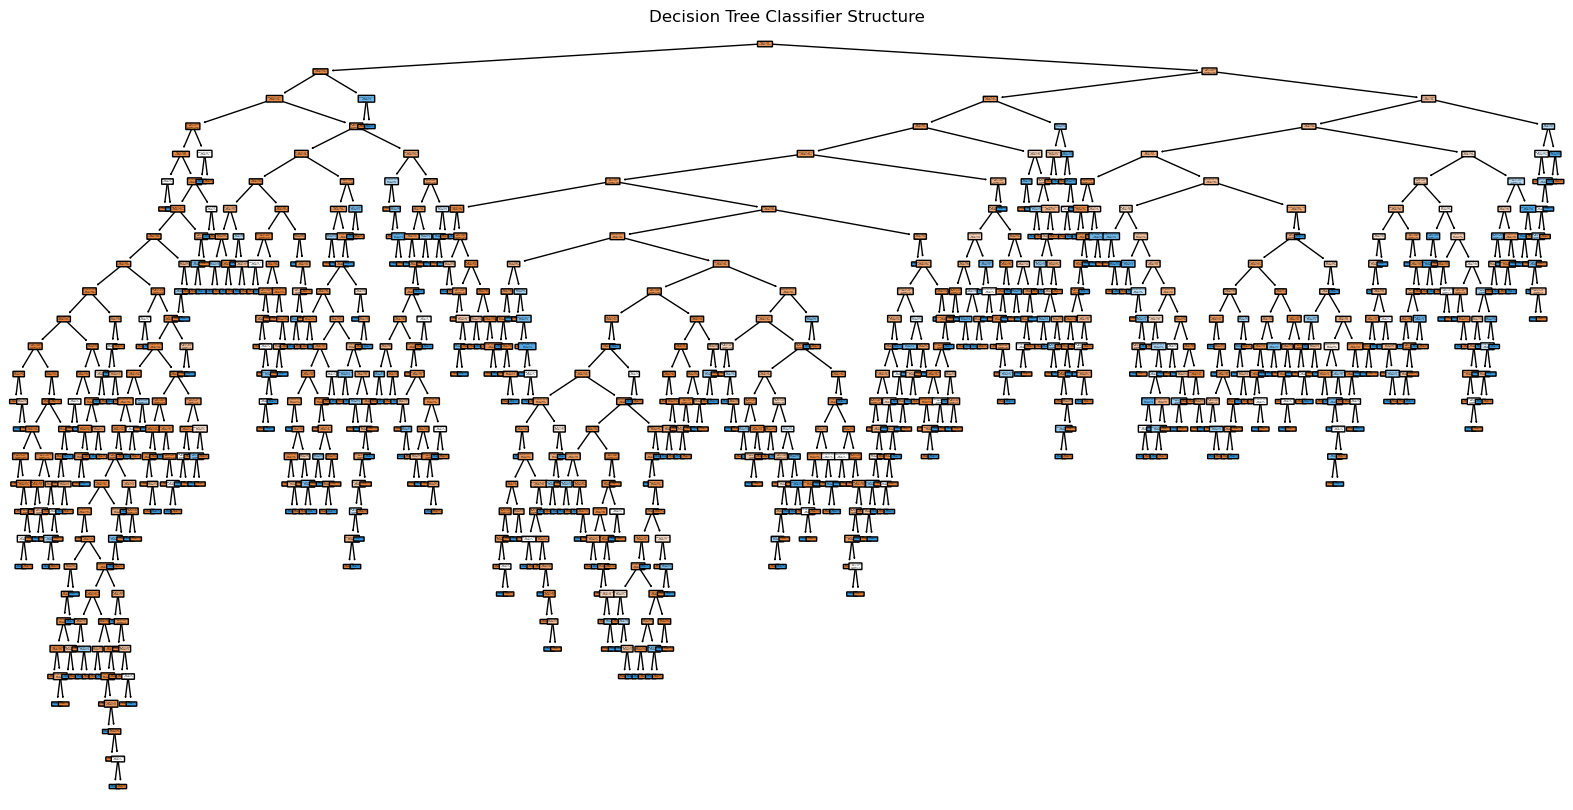

In [473]:
# Decision Tree Classifier model summary
# Decision Tree Classifier does not have a summary method like Logistic Regression.
# However, I can visualize the tree structure to understand the model better.
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Classifier Structure')
plt.show()
# The Decision Tree Classifier structure provides insight into how the model makes decisions based on the features.
# The tree structure shows the splits based on feature values and the corresponding class predictions at the leaves.
# This can help in understanding the model's behavior and feature importance.
# The Decision Tree Classifier is interpretable, and the tree structure can be visualized to understand the model's decisions.


In [474]:
from sklearn.tree import export_text

# X_train — featurelar (DataFrame), dtree — model
tree_rules = export_text(dtree, feature_names=list(X_train.columns))
print(tree_rules)
# The export_text function provides a textual representation of the decision tree rules.
# This can help in understanding the decision-making process of the Decision Tree Classifier.

|--- age <= 48.50
|   |--- glucose <= 221.50
|   |   |--- cigs_per_day <= 17.50
|   |   |   |--- sys_bp <= 192.00
|   |   |   |   |--- bmi <= 16.68
|   |   |   |   |   |--- bmi <= 16.55
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- bmi >  16.55
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- bmi >  16.68
|   |   |   |   |   |--- tot_chol <= 398.50
|   |   |   |   |   |   |--- dia_bp <= 107.50
|   |   |   |   |   |   |   |--- bmi <= 39.42
|   |   |   |   |   |   |   |   |--- age <= 42.50
|   |   |   |   |   |   |   |   |   |--- tot_chol <= 304.50
|   |   |   |   |   |   |   |   |   |   |--- education <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- education >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- tot_chol >  304.50
|   |   |   |   |   |   |   |   |   |   |--- bmi <= 25.27
|   |   |   |   |   | 